# Regression Multi Variable 

In [117]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [118]:
df_boston.shape

(506, 14)

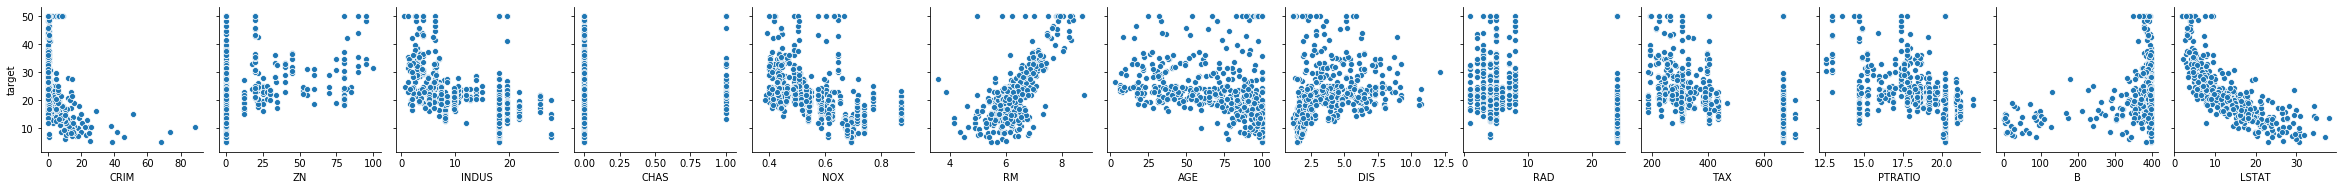

In [119]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_boston, x_vars=boston.feature_names, y_vars='target')

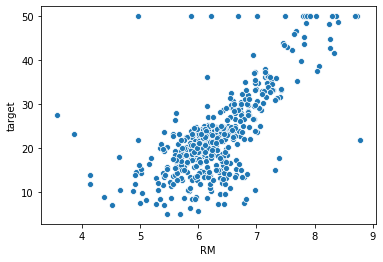

In [120]:
sns.scatterplot(x=df_boston['RM'], y=df_boston['target'])

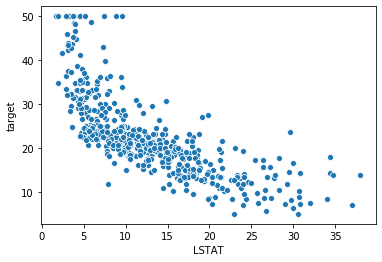

In [121]:
sns.scatterplot(x=df_boston['LSTAT'], y=df_boston['target'])

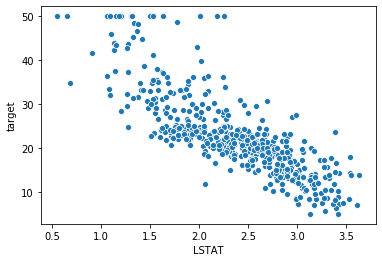

In [122]:
import numpy as np 
sns.scatterplot(x=np.log(df_boston['LSTAT']), y=df_boston['target'])#

In [123]:
#We can compute the correlation 
df_boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


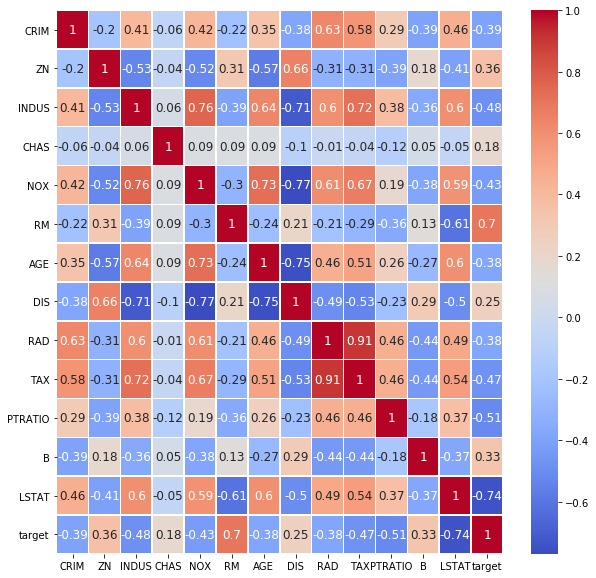

In [124]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_boston.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

###  Brief discussion on correlation

In [125]:
import pandas as pd
df_q = pd.read_csv("quadratic.csv") 

df_q.columns

Index(['x', 'y'], dtype='object')

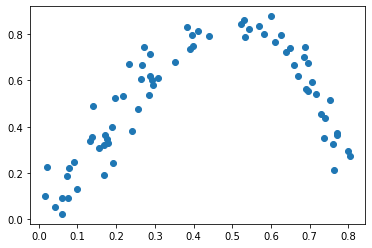

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df_q["x"], df_q["y"], 'o')

In [127]:
df_q.corr()

,x,y
x,1.000000,0.448615
y,0.448615,1.000000


In [128]:
import math 
df_q["x2"]=df_q["x"].apply(lambda x: -(x-0.5)**2)

In [129]:
df_q

,x,y,x2
0,0.154537,0.308410,-0.119345
1,0.175968,0.346179,-0.104997
2,0.140914,0.488696,-0.128943
3,0.265104,0.604524,-0.055176
4,0.232524,0.669098,-0.071544
...,...,...,...
67,0.255167,0.477284,-0.059943
68,0.198173,0.522641,-0.091099
69,0.285703,0.535777,-0.045923
70,0.306991,0.611045,-0.037253


In [130]:
df_q.corr()

,x,y,x2
x,1.000000,0.448615,0.663367
y,0.448615,1.000000,0.895750
x2,0.663367,0.895750,1.000000


In [131]:
from sklearn.linear_model import LinearRegression

simple_regr=LinearRegression()
simple_regr.fit(df_q[["x","x2"]], df_q["y"])

y_pred=simple_regr.predict(df_q[["x","x2"]])


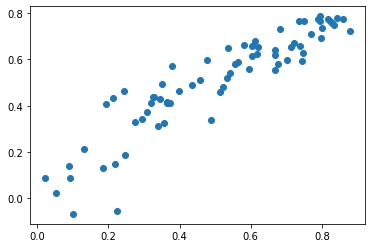

In [132]:
plt.plot(df_q["y"],y_pred,'o')

In [133]:
from sklearn import metrics

print("r2: ",metrics.r2_score(df_q["y"], y_pred ))

r2:  0.8402253913279958


## Select data

In [155]:
from sklearn.model_selection import train_test_split
import numpy as np

# Separate features and target variables
X = df_boston.iloc[:,:-1] #if I want to use all variables
y = df_boston.iloc[:,-1]

#choose your approach:
#X = df_boston.iloc[:,[4,5,10,11,12]] #if I want to use only some variable
#X = X.drop(['INDUS','CHAS','AGE','B'], axis=1) #if I want to drop some columns
X = X[['RM','LSTAT']]#if I want to select some columns
#X["LSTAT2"] = np.log(X.LSTAT) #if I want to log transform the LSTAT variable 

columns = X.columns #column names



In [152]:
X

,RM,LSTAT
0,0.413672,-1.075562
1,0.194274,-0.492439
2,1.282714,-1.208727
3,1.016303,-1.361517
4,1.228577,-1.026501
...,...,...
501,0.439316,-0.418147
502,-0.234548,-0.500850
503,0.984960,-0.983048
504,0.725672,-0.865302


In [153]:
#X = X.drop(["LSTAT"],axis=1)

In [154]:
X = X[['RM','LSTAT2']]#if I want to select some columns


KeyError: "['LSTAT2'] not in index"

In [101]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: target, dtype: float64

In [156]:
X.head()

,RM,LSTAT
0,0.413672,-1.075562
1,0.194274,-0.492439
2,1.282714,-1.208727
3,1.016303,-1.361517
4,1.228577,-1.026501


In [157]:
#Scale and select Train/Test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)


In [158]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = LinearRegression() #(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)[source]¶
parameters = {}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters,cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out

#gs.score(X_train, y_train)
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.682281 using {}
0.682281 (0.035299) with: {}


0.5121950898592784

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

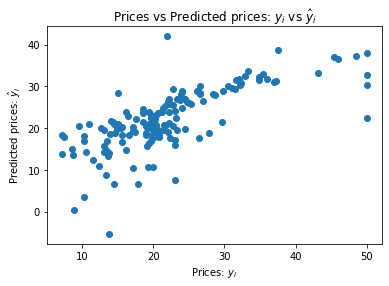

In [159]:
plt.scatter(y_test, gs.predict(X_test))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [160]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

gs.best_estimator_.coef_

#import pandas as pd
#pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

Intercept:  22.54783500630008


array([ 4.24298504, -4.20008422])

In [161]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_squared_error

print("MSE train: ", mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ", mean_squared_error(y_test, gs.predict(X_test)))

MSE train:  27.081670747961883
MSE test:  39.42833999511945


# computing MAE, MSE, RMSE, r²
 - Mean Absolute Error (MAE): $$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
 - Mean Squared Error  (MSE): $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
 - Root Mean Squared Error (RMSE) : $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [162]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",metrics.r2_score(y_train, gs.predict(X_train)))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  3.666097447966144
MSE train:  27.081670747961883
RMSE train:  5.204005260178152
r2:  0.6843149513083313
MAE test:  4.496412721828925
MSE test:  39.42833999511945
RMSE test:  6.279198993113648
r2:  0.5121950898592784


In [163]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

error_train.describe()

count    3.540000e+02
mean    -8.028731e-16
std      5.211371e+00
min     -2.986879e+01
25%     -1.930498e+00
50%      7.431145e-01
75%      3.286534e+00
max      1.359579e+01
Name: target, dtype: float64

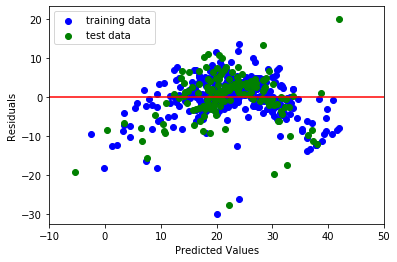

In [164]:
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [165]:
error_train = np.array(error_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()

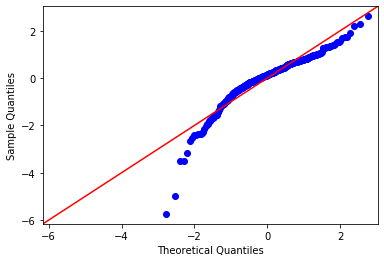

In [166]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(scaled_error_train,line='45')
plt.show()

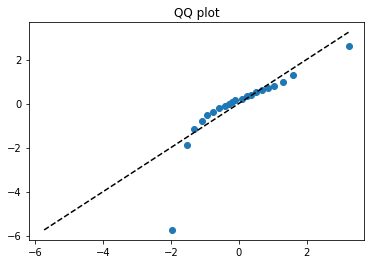

In [167]:
import scipy

# We test a uniform distribution
dist = getattr(scipy.stats, 'norm')
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(0,1,size = len(scaled_error_train))
test_dist.sort()

# We create the percentiles for both distributions
percs = np.linspace(0,100,21)
q_b = np.percentile(scaled_error_train, percs)
q_a = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

In [168]:
# Kolmogorov-Smirnov Test
from scipy import stats
print(stats.kstest(scaled_error_train, 'norm'))

# D’Agostino Test
print(stats.normaltest(scaled_error_train))

KstestResult(statistic=0.11608185891913614, pvalue=0.0001300509350690933)
NormaltestResult(statistic=126.19552714045194, pvalue=3.953570258582985e-28)


## Test parameters (statsmodels)

In [169]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X_train = sm.add_constant(X_train)
#If we want to add a constant to our model 
est = sm.OLS(y_train, X_train)
est_fit = est.fit()
est_fit.params

const    22.547835
RM        4.242985
LSTAT    -4.200084
dtype: float64

In [170]:
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     380.4
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.32e-88
Time:                        11:43:58   Log-Likelihood:                -1086.2
No. Observations:                 354   AIC:                             2178.
Df Residuals:                     351   BIC:                             2190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5478      0.278     81.085      0.0